In [67]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df=pd.read_csv('MS_Dhoni_ODI_record.csv')

In [18]:
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,v Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,v Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,v Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,05/04/2005,ODI # 2236


In [19]:
df.tail()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
345,56*,56,61,91.8,3,2,v West Indies,Manchester,27/06/2019,ODI # 4175
346,42*,42,31,135.48,4,1,v England,Birmingham,30/06/2019,ODI # 4179
347,35,35,33,106.06,4,0,v Bangladesh,Birmingham,02/07/2019,ODI # 4182
348,DNB,-,-,-,-,-,v Sri Lanka,Leeds,06/07/2019,ODI # 4187
349,50,50,72,69.44,1,1,v New Zealand,Manchester,09/07/2019,ODI # 4190


In [20]:
# Data cleaning - we can remove 'v ' from column 'Opposition'
df['opposition']=df['opposition'].apply(lambda x:x[2:])
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,05/04/2005,ODI # 2236


In [21]:
df.tail()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
345,56*,56,61,91.8,3,2,West Indies,Manchester,27/06/2019,ODI # 4175
346,42*,42,31,135.48,4,1,England,Birmingham,30/06/2019,ODI # 4179
347,35,35,33,106.06,4,0,Bangladesh,Birmingham,02/07/2019,ODI # 4182
348,DNB,-,-,-,-,-,Sri Lanka,Leeds,06/07/2019,ODI # 4187
349,50,50,72,69.44,1,1,New Zealand,Manchester,09/07/2019,ODI # 4190


In [22]:
#Add feature - 'year' using match date column
#1st convert date column into datetime format
df['date']=pd.to_datetime(df['date'],dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   score        350 non-null    object        
 1   runs_scored  350 non-null    object        
 2   balls_faced  350 non-null    object        
 3   strike_rate  350 non-null    object        
 4   fours        350 non-null    object        
 5   sixes        350 non-null    object        
 6   opposition   350 non-null    object        
 7   ground       350 non-null    object        
 8   date         350 non-null    datetime64[ns]
 9   odi_number   350 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 27.5+ KB


In [23]:
df['year']=df['date'].dt.year.astype(int)
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,ODI # 2199,2004
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,ODI # 2201,2004
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,ODI # 2202,2004
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,ODI # 2235,2005
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,ODI # 2236,2005


In [24]:
df['score']=df['score'].apply(str)  # to use string functions 1st we convert object type into str type

In [25]:
df['not_out']=np.where(df['score'].str.endswith('*'),1,0)
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year,not_out
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,ODI # 2199,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,ODI # 2201,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,ODI # 2202,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,ODI # 2235,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,ODI # 2236,2005,0
...,...,...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,West Indies,Manchester,2019-06-27,ODI # 4175,2019,1
346,42*,42,31,135.48,4,1,England,Birmingham,2019-06-30,ODI # 4179,2019,1
347,35,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,ODI # 4182,2019,0
348,DNB,-,-,-,-,-,Sri Lanka,Leeds,2019-07-06,ODI # 4187,2019,0


In [26]:
# dropping the odi_number feature because it adds no value to the analysis
df.drop(columns='odi_number',inplace=True)
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0


In [28]:
df['score'].unique()

array(['0', '12', '7*', '3', '148', '28', '47', '11', '24', '2', '15*',
       '20', '28*', '7', '56', '37*', '67*', '38', 'DNB', '183*', '45*',
       '80', '17', '14', '68', '72*', '2*', '77*', '13*', '10*', '96',
       '59', '18', '15', '46*', '23', '51', '55', '26', '44', '62*', '6',
       '40*', 'TDNB', '48', '29', '91*', '36', '33', '139*', '14*', '19',
       '21', '13', '35', '50', '58', '50*', '4', '5', '63', '49', '37',
       '88*', '17*', '31', '64', '109*', '26*', '76', '67', '39', '71',
       '1', '29*', '9', '61*', '35*', '94', '53', '84*', '23*', '41',
       '95', '8', '34', '124', '71*', '72', '107', '101*', '32', '68*',
       '38*', '10', '25', '19*', '12*', '22', '69', '78*', '87*', '75*',
       '44*', '58*', '21*', '4*', '113*', '54*', '27', '25*', '62', '51*',
       '65', '40', '79*', '52', '85*', '92*', '134', '9*', '54', '49*',
       '1*', '79', '3*', '18*', '42*', '42', '55*', '48*', '59*', '56*'],
      dtype=object)

In [33]:
df_new=df.loc[((df['score']!='DNB')&(df['score']!='TDNB')),'runs_scored':]

In [41]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 349
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   runs_scored  297 non-null    int64         
 1   balls_faced  297 non-null    int64         
 2   strike_rate  297 non-null    float64       
 3   fours        297 non-null    int64         
 4   sixes        297 non-null    int64         
 5   opposition   297 non-null    object        
 6   ground       297 non-null    object        
 7   date         297 non-null    datetime64[ns]
 8   year         297 non-null    int64         
 9   not_out      297 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 25.5+ KB


In [35]:
print(df.head())

  score runs_scored balls_faced strike_rate fours sixes  opposition  \
0     0           0           1           0     0     0  Bangladesh   
1    12          12          11      109.09     2     0  Bangladesh   
2    7*           7           2         350     0     1  Bangladesh   
3     3           3           7       42.85     0     0    Pakistan   
4   148         148         123      120.32    15     4    Pakistan   

          ground       date  year  not_out  
0     Chattogram 2004-12-23  2004        0  
1          Dhaka 2004-12-26  2004        0  
2          Dhaka 2004-12-27  2004        1  
3          Kochi 2005-04-02  2005        0  
4  Visakhapatnam 2005-04-05  2005        0  


In [37]:
#fixing the data types of numerical coolumns
df_new['runs_scored']=df_new['runs_scored'].astype(int)

In [38]:
df_new['balls_faced']=df_new['balls_faced'].astype(int)
df_new['strike_rate']=df_new['strike_rate'].astype(float)
df_new['fours']=df_new['fours'].astype(int)
df_new['sixes']=df_new['sixes'].astype(int)

In [39]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 349
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   runs_scored  297 non-null    int64         
 1   balls_faced  297 non-null    int64         
 2   strike_rate  297 non-null    float64       
 3   fours        297 non-null    int64         
 4   sixes        297 non-null    int64         
 5   opposition   297 non-null    object        
 6   ground       297 non-null    object        
 7   date         297 non-null    datetime64[ns]
 8   year         297 non-null    int64         
 9   not_out      297 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 25.5+ KB


### career start date and last match date

In [40]:
first_match_date=df['date'].dt.date.min().strftime('%B %d, %Y')
print("first Match:",first_match_date)
last_match_date=df['date'].dt.date.max().strftime('%B %d, %Y')
print("last Match:",last_match_date)

first Match: December 23, 2004
last Match: July 09, 2019


In [44]:
total_match=df.shape[0]
print("No of matches played:",total_match)

No of matches played: 350


In [45]:
no_of_inns=df_new.shape[0]
print("No of Innings played:",no_of_inns)

No of Innings played: 297


In [46]:
not_outs=df_new['not_out'].sum()
print("Not Outs:",not_outs)

Not Outs: 84


In [47]:
runs_scord=df_new['runs_scored'].sum()
print("Runs scored in career: ",runs_scord)

Runs scored in career:  10773


In [48]:
balls_faced=df_new['balls_faced'].sum()
print("balls faced in career: ",balls_faced)

balls faced in career:  12303


In [49]:
career_st=(runs_scord/balls_faced)*100
print("career strike rate: {:.2f}".format(career_st))

career strike rate: 87.56


In [50]:
career_avg=(runs_scord/(no_of_inns-not_outs))
print("career Average: {:.2f}".format(career_avg))

career Average: 50.58


In [52]:
highest_score_date=df_new.loc[df_new.runs_scored==df_new.runs_scored.max(),'date'].values[0]
print("Highest Score Date",highest_score_date)

Highest Score Date 2005-10-31T00:00:00.000000000


In [53]:
highest_score=df.loc[df.date==highest_score_date,'score'].values[0]
print("Highest score in career",highest_score)

Highest score in career 183*


In [54]:
hundreds=df_new.loc[df_new['runs_scored']>=100].shape[0]
print('Number of 100s: ',hundreds)

Number of 100s:  10


In [56]:
fiftys=df_new.loc[(df_new.runs_scored>=50) & (df_new.runs_scored<100)].shape[0]
print('Number of 50s: ',fiftys)

Number of 50s:  73


In [58]:
df_new['ishundred']=np.where(df_new.runs_scored>=100,1,0)
df_new.head()

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out,ishundred
0,0,1,0.00,0,0,Bangladesh,Chattogram,2004-12-23,2004,0,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0,0
2,7,2,350.00,0,1,Bangladesh,Dhaka,2004-12-27,2004,1,0
3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0,1


In [59]:
h=df_new.ishundred.sum()
h

10

In [62]:
df_new['isfifty']=np.where((df_new.runs_scored>=50) & (df_new.runs_scored<100),1,0)
df_new.tail()

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out,ishundred,isfifty
344,28,52,53.84,3,0,Afghanistan,Southampton,2019-06-22,2019,0,0,0
345,56,61,91.80,3,2,West Indies,Manchester,2019-06-27,2019,1,0,1
346,42,31,135.48,4,1,England,Birmingham,2019-06-30,2019,1,0,0
347,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,2019,0,0,0
349,50,72,69.44,1,1,New Zealand,Manchester,2019-07-09,2019,0,0,1


In [63]:
fifty=df_new.isfifty.sum()
fifty

73

In [65]:
df_new.sixes.sum()

229

In [66]:
df_new.fours.sum()

826

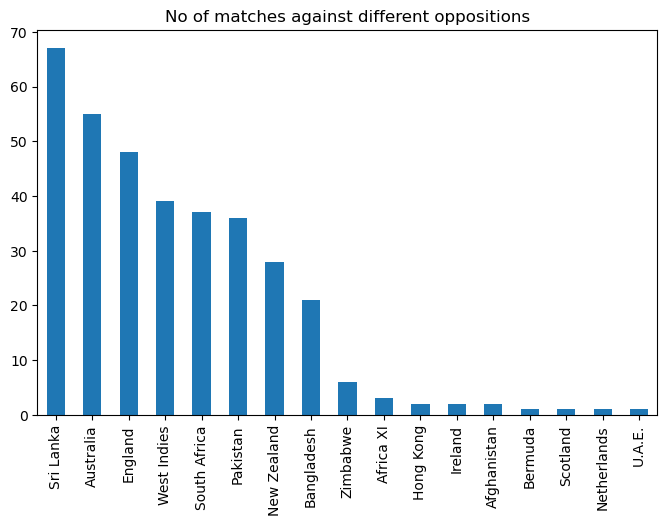

In [76]:
df['opposition'].value_counts().plot(kind='bar',title='No of matches against different oppositions',figsize=(8,5));
### ';' suppress extra text display by matplotlib
plt.show()

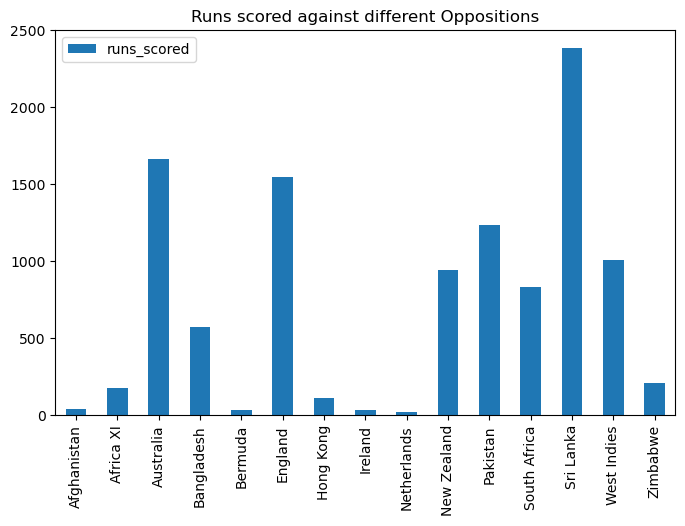

In [95]:
runs=pd.DataFrame(df_new.groupby('opposition')['runs_scored'].sum())
runs.plot(kind='bar',title='Runs scored against different Oppositions',figsize=(8,5));
plt.xlabel(None);
plt.show()

### Batting average against each team

In [88]:
inn_by_opposition=pd.DataFrame(df_new.groupby('opposition')['date'].count())
print(inn_by_opposition)

              date
opposition        
Afghanistan      2
Africa XI        3
Australia       48
Bangladesh      17
Bermuda          1
England         44
Hong Kong        2
Ireland          1
Netherlands      1
New Zealand     26
Pakistan        31
South Africa    32
Sri Lanka       53
West Indies     33
Zimbabwe         3


In [91]:
df_new.groupby('opposition').count()

,runs_scored,balls_faced,strike_rate,fours,sixes,ground,date,year,not_out,ishundred,isfifty
opposition,,,,,,,,,,,
Afghanistan,2,2,2,2,2,2,2,2,2,2,2
Africa XI,3,3,3,3,3,3,3,3,3,3,3
Australia,48,48,48,48,48,48,48,48,48,48,48
Bangladesh,17,17,17,17,17,17,17,17,17,17,17
Bermuda,1,1,1,1,1,1,1,1,1,1,1
England,44,44,44,44,44,44,44,44,44,44,44
Hong Kong,2,2,2,2,2,2,2,2,2,2,2
Ireland,1,1,1,1,1,1,1,1,1,1,1
Netherlands,1,1,1,1,1,1,1,1,1,1,1


In [92]:
notout_by_opposition=pd.DataFrame(df_new.groupby('opposition')['not_out'].sum())
print(notout_by_opposition)

              not_out
opposition           
Afghanistan         0
Africa XI           1
Australia          11
Bangladesh          5
Bermuda             0
England            11
Hong Kong           1
Ireland             0
Netherlands         1
New Zealand         7
Pakistan            8
South Africa        6
Sri Lanka          16
West Indies        15
Zimbabwe            2


In [93]:
df_new.groupby('opposition')['not_out'].sum()

opposition
Afghanistan      0
Africa XI        1
Australia       11
Bangladesh       5
Bermuda          0
England         11
Hong Kong        1
Ireland          0
Netherlands      1
New Zealand      7
Pakistan         8
South Africa     6
Sri Lanka       16
West Indies     15
Zimbabwe         2
Name: not_out, dtype: int64

In [ ]:
# runs, inn_by_opposition, notout_by_opposition => Merge

In [96]:
temp=runs.merge(inn_by_opposition,left_index=True,right_index=True)
temp

,runs_scored,date
opposition,,
Afghanistan,36,2
Africa XI,174,3
Australia,1660,48
Bangladesh,569,17
Bermuda,29,1
England,1546,44
Hong Kong,109,2
Ireland,34,1
Netherlands,19,1


In [99]:
avg_by_opposition=temp.merge(notout_by_opposition,left_index=True,right_index=True)
avg_by_opposition

,runs_scored,date,not_out
opposition,,,
Afghanistan,36,2,0
Africa XI,174,3,1
Australia,1660,48,11
Bangladesh,569,17,5
Bermuda,29,1,0
England,1546,44,11
Hong Kong,109,2,1
Ireland,34,1,0
Netherlands,19,1,1


In [100]:
avg_by_opposition.rename(columns={'date':'innings'},inplace=True)
avg_by_opposition

,runs_scored,innings,not_out
opposition,,,
Afghanistan,36,2,0
Africa XI,174,3,1
Australia,1660,48,11
Bangladesh,569,17,5
Bermuda,29,1,0
England,1546,44,11
Hong Kong,109,2,1
Ireland,34,1,0
Netherlands,19,1,1


In [101]:
avg_by_opposition['eff_no_of_in']=avg_by_opposition['innings']-avg_by_opposition['not_out']
avg_by_opposition

,runs_scored,innings,not_out,eff_no_of_in
opposition,,,,
Afghanistan,36,2,0,2
Africa XI,174,3,1,2
Australia,1660,48,11,37
Bangladesh,569,17,5,12
Bermuda,29,1,0,1
England,1546,44,11,33
Hong Kong,109,2,1,1
Ireland,34,1,0,1
Netherlands,19,1,1,0


In [102]:
avg_by_opposition['average']=avg_by_opposition['runs_scored']/avg_by_opposition['eff_no_of_in']
avg_by_opposition

,runs_scored,innings,not_out,eff_no_of_in,average
opposition,,,,,
Afghanistan,36,2,0,2,18.000000
Africa XI,174,3,1,2,87.000000
Australia,1660,48,11,37,44.864865
Bangladesh,569,17,5,12,47.416667
Bermuda,29,1,0,1,29.000000
England,1546,44,11,33,46.848485
Hong Kong,109,2,1,1,109.000000
Ireland,34,1,0,1,34.000000
Netherlands,19,1,1,0,inf


In [103]:
avg_by_opposition.replace(np.inf,np.nan,inplace=True)
avg_by_opposition

,runs_scored,innings,not_out,eff_no_of_in,average
opposition,,,,,
Afghanistan,36,2,0,2,18.000000
Africa XI,174,3,1,2,87.000000
Australia,1660,48,11,37,44.864865
Bangladesh,569,17,5,12,47.416667
Bermuda,29,1,0,1,29.000000
England,1546,44,11,33,46.848485
Hong Kong,109,2,1,1,109.000000
Ireland,34,1,0,1,34.000000
Netherlands,19,1,1,0,NaN


In [108]:
major_nations=['Australia','England','New Zealand','Pakistan','South Africa','Sri Lanka','West Indies']

In [109]:
# creates a new figure for the plot with a specified figure size of 8 inches in width and 5 inches in height
plt.figure(figsize=(8,5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

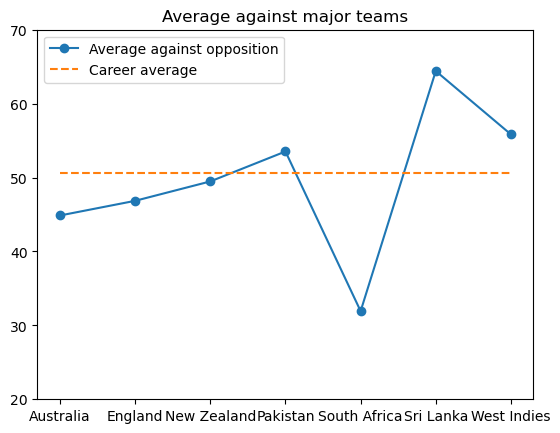

In [120]:
plt.plot(avg_by_opposition.loc[major_nations,'average'].values,marker='o');
plt.plot([career_avg]*len(major_nations),'--')
plt.title('Average against major teams');
plt.xticks(range(0,7),major_nations);

plt.ylim(20,70)
plt.legend(['Average against opposition','Career average']);
plt.show()

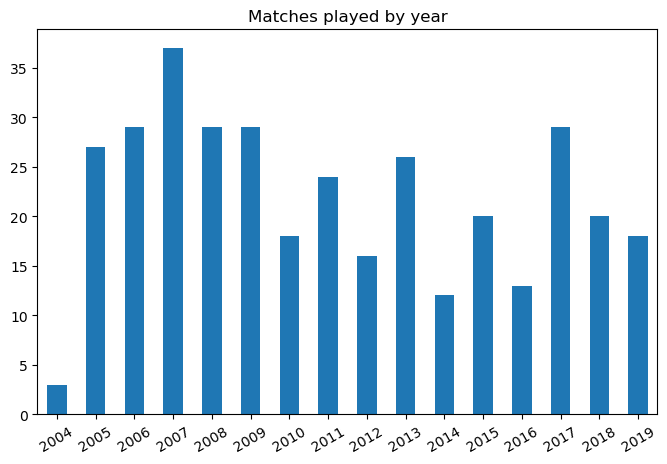

In [125]:
# year wise record
df['year'].value_counts().sort_index().plot(kind='bar',title='Matches played by year',figsize=(8,5))
plt.xticks(rotation=30)
plt.show()

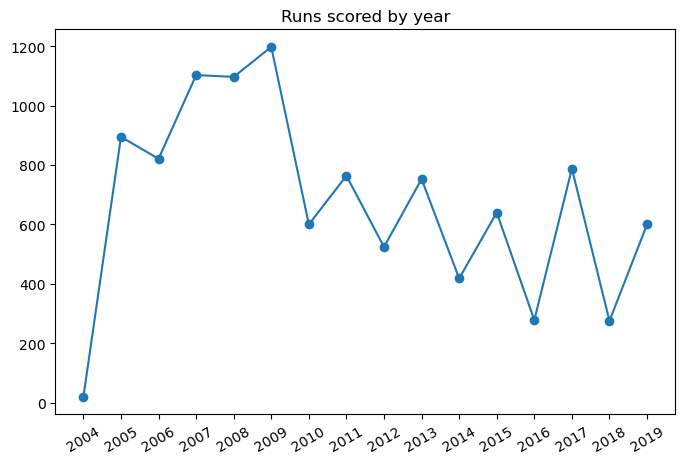

In [128]:
#Runs scored year wise
df_new.groupby('year')['runs_scored'].sum().plot(kind='line',marker='o',title='Runs scored by year',figsize=(8,5))
years=df['year'].unique().tolist()
plt.xticks(years,rotation=30)
plt.xlabel(None)
plt.show()